In [1]:
# Import Required Library [Detailed Description available in README.md file]
import zipfile
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data using tensor flow

In [3]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [8]:
# Path to the zip file
zip_file_path = parent_dir+"/datasets/raw_dataset/Faultfindy.zip"

url = "https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated%20Project%20guide%20data%20set/Faultfindy.zip"

tf.keras.utils.get_file(zip_file_path,origin=url,extract=False)


# Directory where you want to extract the contents of the zip file
extracted_dir = parent_dir+'/datasets/raw_dataset/'

# Open the zip file for reading
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the zip file into the specified directory
    zip_ref.extractall(extracted_dir)


print("Data extraction completed.")


2859243786/2859243786 ━━━━━━━━━━━━━━━━━━━━ 1416s 0us/step
Data extraction completed.


In [9]:
Batch_size =32 # the Batch size is to fetch the data
IMG_size = (256,256) # Image size in which the image should be fetched
dataset_dir = extracted_dir+"Digital images of defective and good condition tyres" # dataset directory

In [10]:
#Load the data with the help of the tensorflow keras utils model :
dataset =  tf.keras.utils.image_dataset_from_directory(dataset_dir ,image_size=IMG_size)                                                                                 

Found 1856 files belonging to 2 classes.


In [11]:
#Class Name : 
class_name= dataset.class_names
class_name

['defective', 'good']

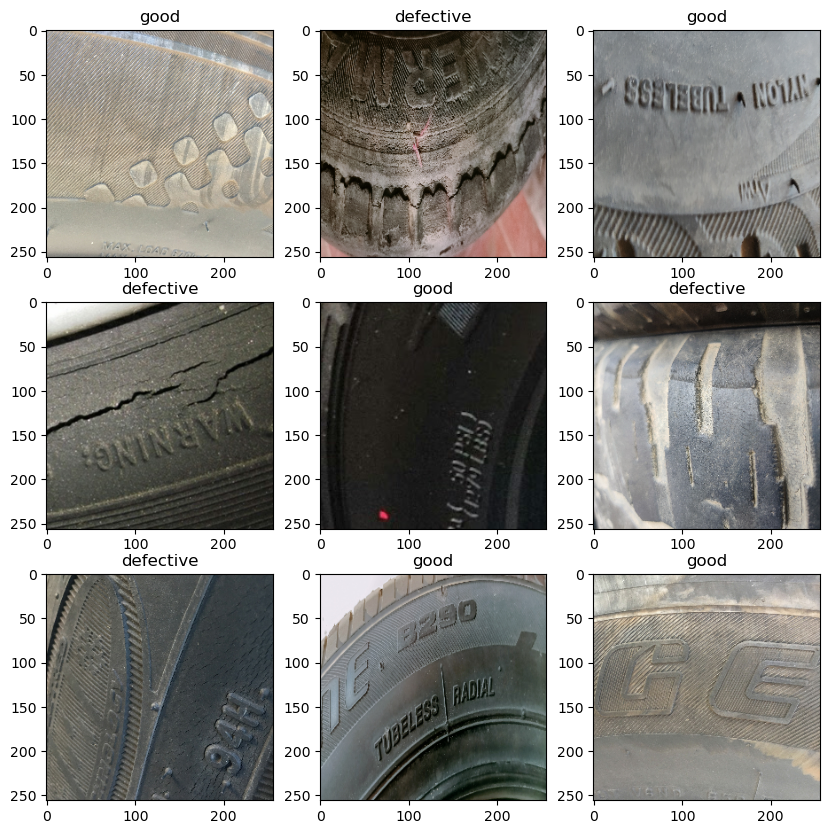

In [12]:
#Visualization of the random dataset image :
plt.figure(figsize=(10,10))
for image, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_name[labels[i]])       


In [13]:
# Initialize an empty dictionary to store class counts
class_counts = {}

# Iterate over the dataset to count occurrences of each class
for images, labels in dataset:
    for label in labels.numpy():
        class_name = dataset.class_names[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Print class distribution
print("Class Distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")

Class Distribution:
defective: 1028 samples
good: 828 samples


In [14]:
# Initialize an empty list to store class counts
class_counts = []

# Iterate over the dataset to count occurrences of each class
for images, labels in dataset:
    for label in labels.numpy():
        class_counts.append(label)



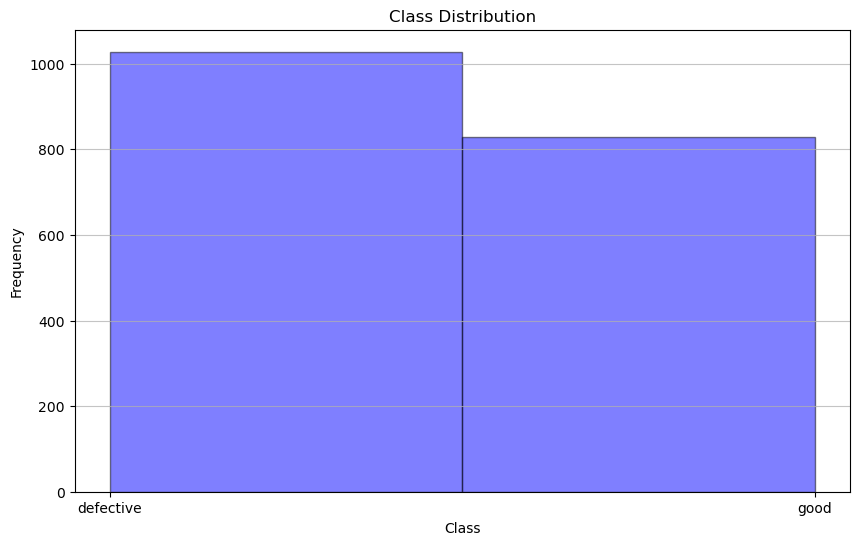

In [15]:
# Plot count plot for class distribution
plt.figure(figsize=(10, 6))
plt.hist(class_counts, bins=len(dataset.class_names), alpha=0.5, color='b', edgecolor='k')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(range(len(dataset.class_names)), dataset.class_names)
plt.grid(axis='y', alpha=0.75)


# Save the plot in visuals folder

plt.savefig(parent_dir+'\\visuals\\class_distribution.png')

plt.show()